In [143]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [144]:
x_source=numpy.loadtxt("../AeroPython/lessons/resources/NACA0012_x.txt")

y_source=numpy.loadtxt("../AeroPython/lessons/resources/NACA0012_y.txt")

sigma=numpy.loadtxt("../AeroPython/lessons/resources/NACA0012_sigma.txt")


In [145]:
N = 51

x_start, x_end = -1.0, 2.0

y_start, y_end = -0.5, 0.5

x = numpy.linspace(x_start, x_end, N)

y = numpy.linspace(y_start, y_end, N)

print('x = ', x)

print('y = ', y)

X, Y = numpy.meshgrid(x, y)

x =  [-1.   -0.94 -0.88 -0.82 -0.76 -0.7  -0.64 -0.58 -0.52 -0.46 -0.4  -0.34
 -0.28 -0.22 -0.16 -0.1  -0.04  0.02  0.08  0.14  0.2   0.26  0.32  0.38
  0.44  0.5   0.56  0.62  0.68  0.74  0.8   0.86  0.92  0.98  1.04  1.1
  1.16  1.22  1.28  1.34  1.4   1.46  1.52  1.58  1.64  1.7   1.76  1.82
  1.88  1.94  2.  ]
y =  [-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2
  0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44
  0.46  0.48  0.5 ]


In [146]:
numpy.shape(x_source)

(100,)

In [147]:
u_inf = 1.0

u_freestream = u_inf *numpy.ones((N, N), dtype=float)

v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [148]:
def get_velocity(sigma, x_source, y_source, X, Y):

    u = sigma/(2*numpy.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
    v = sigma/(2*numpy.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)
    
    return u, v

In [149]:
len(x_source)

100

In [150]:
U_source = 0.0
V_source = 0.0
for i in range(len(x_source)):
    
    u_source, v_source = get_velocity(sigma[i], x_source[i], y_source[i], X, Y)
    
    U_source += u_source
    
    V_source += v_source

In [151]:
def get_stream_function(sigma, X, Y, x_source, y_source):
    
    psi = sigma/(2*numpy.pi)*numpy.arctan2((Y-y_source), (X-x_source))
    
    return psi

In [152]:
Psi_source = 0.0
for i in range(100):
    psi_source = get_stream_function(sigma[i], X, Y, x_source[i], y_source[i])
    
    Psi_source += psi_source

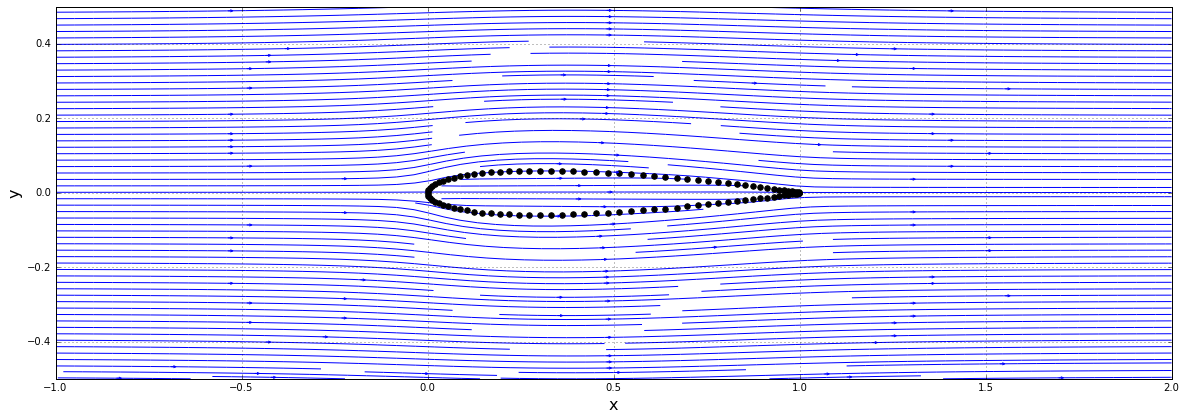

In [153]:
u = u_freestream + U_source

v = v_freestream + V_source

psi = psi_freestream + Psi_source

size = 20

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))

pyplot.grid(True)

pyplot.xlabel('x', fontsize=16)

pyplot.ylabel('y', fontsize=16)

pyplot.xlim(x_start, x_end)

pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=0.5, arrowstyle='->')

pyplot.scatter(x_source, y_source, color='k', s=30, marker='o')

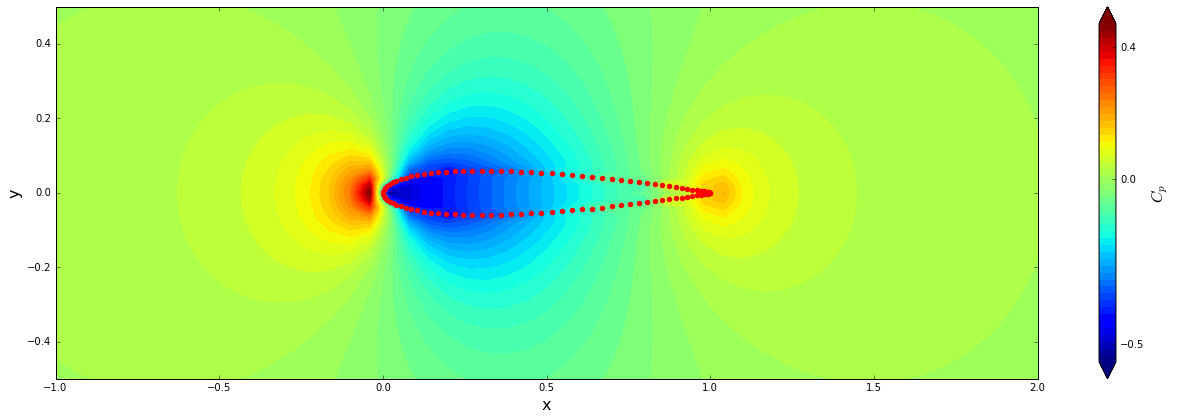

In [154]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 20

pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))

pyplot.xlabel('x', fontsize=16)

pyplot.ylabel('y', fontsize=16)

pyplot.xlim(x_start, x_end)

pyplot.ylim(y_start, y_end)

contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(numpy.min(cp), numpy.max(cp), 50), extend='both')

cbar = pyplot.colorbar(contf)

cbar.set_label('$C_p$', fontsize=16)

cbar.set_ticks([-0.5, 0.0, 0.4])

pyplot.scatter(x_source, y_source, color='r', s=20, marker='o')

In [155]:
numpy.max(cp)

0.47144366133162408